# QOSF Mentorship 2021 Screening Task 4: MacCut Problem

## Description

The [MaxCut problem](https://en.wikipedia.org/wiki/Maximum_cut) is a well-known optimization problem in which the nodes of a given undirected graph have to be divided in two sets (often referred as the set of “white” and “black” nodes) such that the number of edges connecting a white node with a black node are maximized. The MaxCut problem is a problem on which the QAOA algorithm has proved to be useful (for an explanation of the QAOA algorithm you can read [this blogpost](https://www.mustythoughts.com/quantum-approximate-optimization-algorithm-explained)).

At [this link](https://lucaman99.github.io/new_blog/2020/mar16.html) you can find an explicit implementation of the QAOA algorithm to solve the MaxCut problem for the simpler case of an unweighted graph. We ask you to generalize the above code to include also the solution for the case of weighted graphs. You can use the same code or you can also do an alternative implementation using, for example, qiskit. The important point is that you do not make use of any built-in QAOA functionalities.

In [ ]:
#!pip install pennylane
#!pip install pylatexenc

In [1]:
#!/usr/bin/python
import pennylane as qml
from pennylane import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

import networkx as nx
import pylab

from math import pi
import random
import itertools
import os
from IPython.display import SVG, display
from typing import List, Union, Sequence, Dict, Optional

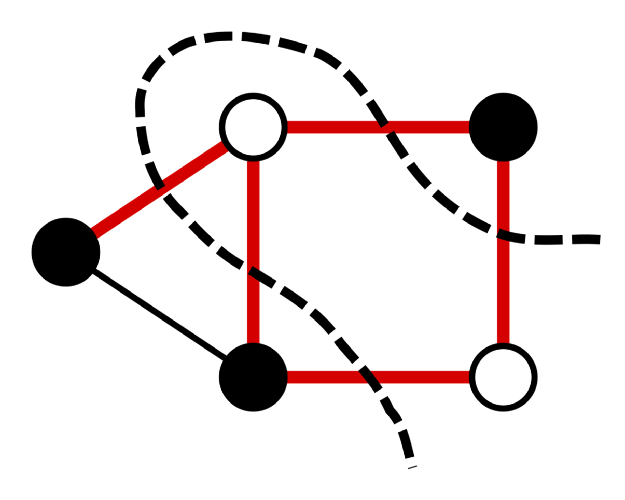


## What is the MaxCut Problem?

The aim is to maximize the number of edges that are cut by a given parition of vertices into two subsets in a graph. If color denotes part, 5 edges will be cut to group white and black as illustrated above, to depart black nodes and white nodes.

It is a combinatorial optimization problem to find the best solution from a finite set of solutions, which involves graphs or ordering some objects. Travelling Salesman Problem and Knapsack Problem are the well-known examples.

Combinatorial explosion is that the number of all possible solutions grows extremely fast with the size of the problem. 
It is a NP hard problem that there are no efficient methods for solving exactly big instances of a given problem. 

Maximum cut can be formulated by assigning each node the binary values of +1 or -1 as the spin variables shown below: 

$$\max_{s}\frac{1}{2}\sum_{ij\in E}^\ (I-s_is_j), s_i \in \{-1, +1\}$$

From the above graph, we observe that there are two colors, say black nodes have the value of +1 while white nodes contain -1.

When two spins are in the same sign, i.e., $1\times1=1$ or $-1\times-1=1$, so $\frac{1}{2}(1-s_is_j)=0$. Therefore, there is no contribution to the indicative function from this edge, which will not be cut.

On the contrary, if they are different sign, i.e. $1\times-11=-1$ or $-1\times1=-11$, so $\frac{1}{2}(1-s_is_j)=\frac{1}{2}(1-(-1))=1$. The value indicate the number of edge is being cut, which contribute to our desired function. Therefore, the formulation is valid.

## Solving Combinatorial Optimization Problems on a Quantum Computer

To solve combinatorial optimization problems on a quantum computer, conversion of the classical description into the charaterization of a quantum Hamiltonian, i.e. Hermitian operator is essential. Therefore, the solution of binary string in classical optimization problem is transformed to be finding the highest energy eigenstate or the largest eigenvalue eigenvector or the hermitian operator. It is noted that the Hamiltonian is classical where the eigenvector is computational basis state. We can prepare the eigenvector by diagonalizing the Hamiltonian to find the corresponding eigenvalues via sampling the number of initial basis states. Therefore, the solution can be obtained with certainty.

As mentioned above, Hamiltonian is diagonal with values on the diagonal corresponding to the values of the indicative function.

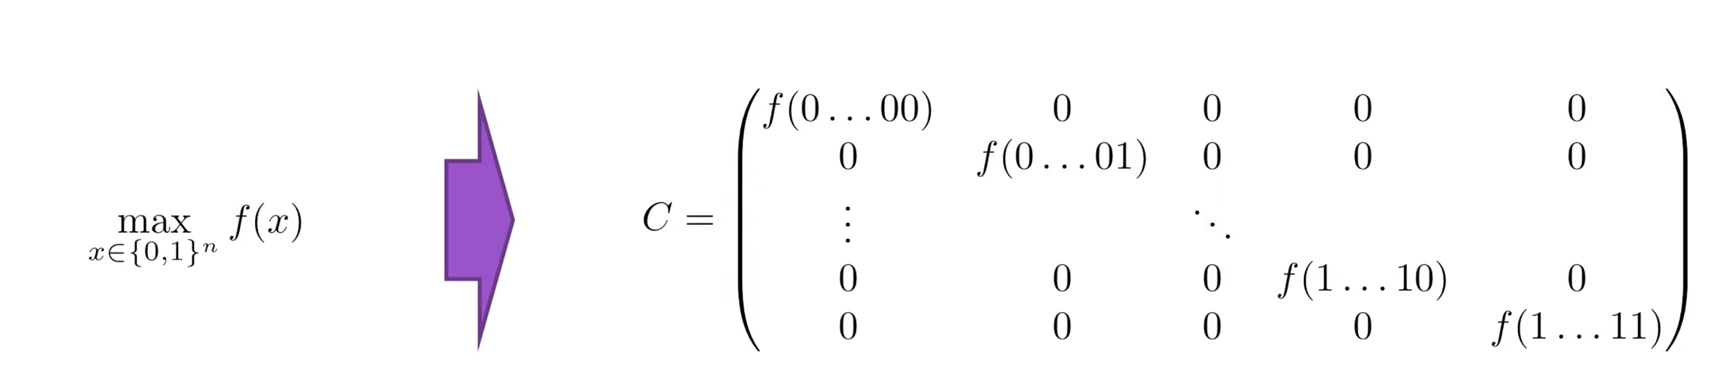

We want to maximize value of $f(x)$, and $x$ takes all the values on the boolean cube, where the hamiltonian naming $C$ have its diagonal value of $f(x)$ on $f(000...00)$, $f(000.001)$,...,$f(111.111)$. It is $2^n$ operator. 

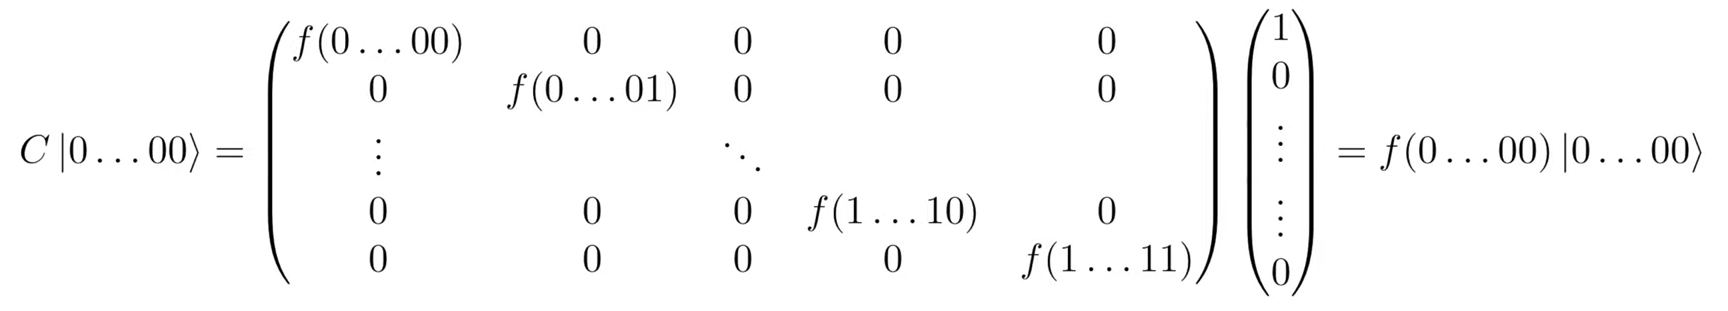

If we apply the operator $C$ acting on the vacuum state, the combinational basis state $|000...000>$, the corrresponding eigenvalue $f(000....000)$ can be obtained. Therefore, we want the indicative to act on any basis states to generate the corresponding eigenvalue. We here can simply name $f(x)$ as $C(x)$.

$$C|x> = C(x)|x>,  \forall x\in \{0,1\}^n$$

However, the Hamiltonian is too large to be constructed explicitly. Instead, we only need to pick the largest element in the Hamiltonian by developing compacy formulations constructing from basic building blocks which will be our desired solution.

$$C = \frac{1}{2}\sum_{ij\in E}^\ (I-Z_iZ_j)$$

Max Cut Hamiltonian is constructed by mapping binary variables $s_is_j$ onto the eigenvalues of $Z$, where $Z$ is the Pauli Operator Z.

$$Z = \left[\begin{array}{cc} 1 & 0\\
0 & 1 \end{array} \right]$$

In this Pauli $Z$ operator, eigenvalues -1 and +1 can be obtained with eigenvectors being computational basis states.

$$Z|0> = \left[\begin{array}{cc} 1 & 0\\ 0 & 1 \end{array} \right] \left[\begin{array}{cc} 1 \\ 0\end{array} \right] =  \left[\begin{array}{cc} 1 \\ 0\end{array} \right] = |0>, Z|1> = \left[\begin{array}{cc} 1 & 0\\ 0 & 1 \end{array} \right] \left[\begin{array}{cc} 0 \\ 1\end{array} \right] =  \left[\begin{array}{cc} 1 \\ 0\end{array} \right] = (-1)|1> $$

In a more consise way, the following can be obtained, 

$$Z|x> = (-1)^x |x>, x\in \{0,1\}$$

If there are i $Z$ operators acting on the initial state with i qubits $|x_0x_1x_2...x_n>$, we will have:

$$Z_i|x_0x_1x_2...x_n> = I \otimes ... \otimes Z_i \otimes ... \otimes I |x_0x_1x_2...x_n>$$

$$=(-1)^x |x_0x_1x_2...x_n>, x\in \{0,1\}, i = 1,2,...,n$$

If there are i $Z_i$ and j $Z_j$ operators acting on the initial state with i qubits $|x_0x_1x_2...x_n>$, we will have:

$$Z_iZ_j|x_0x_1x_2...x_n> = I \otimes ... \otimes Z_i \otimes Z_j \otimes  ... \otimes I |x_0x_1x_2...x_n>$$
$$=(-1)^{x_i} (-1)^{x_j} |x_0x_1x_2...x_n>, x_i, x_j \in \{0,1\}, i = 1,2,...,n$$

, where the ith and jth qubit are adjacent.

By convenience of Puali $Z$ operator, now we can simplify our forumlation to:

$$x_i = \frac{1}{2}(1-s_i), s_i \in \{-1, +1\} $$
$$s_i = 1 \rightarrow x_i = 0\Longleftrightarrow (-1)^{x_i} = 1 = s_i$$
$$s_i = -1 \rightarrow x_i = 1\Longleftrightarrow (-1)^{x_i} = 1 = s_i$$

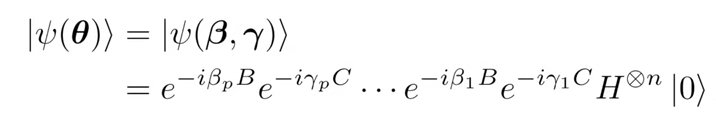

# Coding Part

Graph is drawn to see how it looks like. Take the below graph as an example.

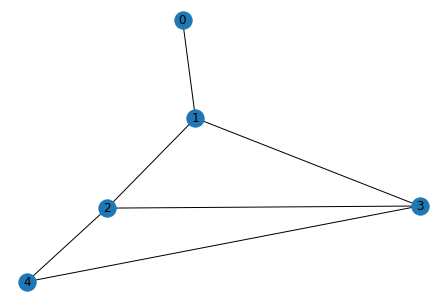

In [28]:
n_wires = 5
graph = [(0,1,3.0),(1,2,4.0),(1,3,2.0),(2,3,7.0),(2,4,5.0),(3,4,1.0)]
G=nx.Graph()
G.add_weighted_edges_from(graph)
nx.draw(G,with_labels=True)

Algorithms used are always deterministic in nature. Python uses a Mersenne Twister pseudorandom number generator(PNRG) to generate random numbers. It generates a sequence of numbers that are not truly random. They can be determined by an initial value which is called the seed or random seed. A random seed is basically an integer that will initialize a generator to produce a sequence of random numbers. `numpy.random.seed()` helps us to determine the sequence of random numbers generated by taking an integer value to generate the same sequence of random numbers. This can be particularly helpful when testing or reproducing results. 

In [29]:
np.random.seed(50)

We define the three operator will be used in the circuit to act sequence of operator on an initial state. Hadamard gates $H$ will be implemented to get all each qubit to be in superposition. The mixer operator is that for each node we apply which rotation around `X` axis. All operator in the sum commute and therefore can be split into a product of exponentiated Pauli X Operator. The cost operator is that it will go through the edges, for each edge of their neighbouring index will be appended by `CNOT` and `RZ`. These two unitary operators is to approximate the continuous evolution. This is approximated by a first order Trotter-Suzuki decomposition with the number of Trotter steps euqal to one. 

In [30]:
def H_superposition(n_wires):
    for qnode in range(n_wires):
        qml.Hadamard(wires=qnode)

In [31]:
def HM(beta,n_wires):
    for qnode in range(n_wires):
        qml.RX(2 * beta, wires=qnode)

In [32]:
def HC(gamma,graph):
    for edge in graph:
        
        wire1=edge[0]
        wire2=edge[1]
        w=edge[2]
        
        qml.CNOT(wires=[wire1, wire2])
        qml.RZ(-w*gamma, wires=wire2)
        qml.CNOT(wires=[wire1, wire2])

Measurement on a system of qubits will be sampled.
An operator is Hermitian if each element is equal to its adjoint.Hermitian operators are those operators that have only real eigenvalues. This is particularly important since physical quantities such as position, momentum, energy etc. are all real values. Hence the operators associated with these physical observables must yield real eigenvalues. This is why physical observables are invariably associated with Hermitian operators.

In [33]:
def comp_basis_measurement(wires):
    n_wires = len(wires)
    return qml.Hermitian(np.diag(range(2 ** n_wires)), wires=wires)

We define the basic matrix Pauli Martrix $Z$. With the help of np.kron() method, we can get the Kronecker product of two lists by using np.kron() method.

In [34]:
pauli_z = [[1, 0], [0, -1]]
pauli_z_2 = np.kron(pauli_z, pauli_z)

A device is created to exercute the ciruit on.

In [35]:
dev = qml.device("default.qubit", wires=n_wires, analytic=True, shots=1)

In [36]:
@qml.qnode(dev)
def circuit(gammas, betas,n_wires,graph, edge=None, n_layers=1):

    H_superposition(n_wires)
    for i in range(n_layers):
        HC(gammas[i],graph)
        HM(betas[i],n_wires)
    
    if edge is None:
        return qml.sample(comp_basis_measurement(range(n_wires)))
    
    return qml.expval(qml.Hermitian(pauli_z_2, wires=(edge[0],edge[1])))  # 1 circuit for eatc edge ?? sems not very practical

The bit strings correspond to the maximum cut on a graph as the ground state of a Hamiltonian encoding the cost function. The form ofthis Hamiltonian can be determined by constructing the classical function that returns a 1 or weight of the edge if the edge spans two-nodes in different sets, or 0 if the nodes are in the same set.

The total cost is the sum of all neighbouring node paris that form the edge set of the graph. This suggests that the Max Cut the Hamiltonian that encode the problem as below:

In [37]:
def indicative(params,n_layers,n_wires,graph):
    gammas = params[0]
    betas = params[1]
    obj = 0
    for edge in graph:
        obj -= 0.5 * (1 - edge[2]*circuit(gammas, betas,n_wires=n_wires,graph=graph, edge=edge, n_layers=n_layers))
    return obj

After executing the quantum gate, the state will evolve with selected betta and gamma angles. In order to identify the set of betta and gammma angles that maximize the function, the AdagradOptimizer can be implemented. 

The paramters near zero is initialized, and then 'AdagradOptimizer' is called to optimize the parameters beta and gamma in the cost function. 'list_of_c' is created to collect all the optimized value of the cost function and 'bit_strings' is also created to store the value of bitstrings. THe optimal parameters and the most frequently sampled bitstring are print in the iteration. 4 layers with 120 steps are generated for sampling.

In [38]:
def maxcut(n_layers=1):
    print("\n number of layers ={:d}".format(n_layers))

    init_params = 0.01*np.random.rand(2,n_layers)
  
    opt = qml.AdagradOptimizer(stepsize=0.5)
    
    params = init_params
    steps=120
    list_obj=[]
    for i in range(steps):
        params = opt.step(indicative,params,n_wires=n_wires,graph=graph, n_layers=n_layers)
        if (i+1) % 5 == 0:

            print("-Cost after step {:5d}: {: .7f}".format(i+1,-indicative(params,n_layers,n_wires,graph)))

    bit_strings = []
    n_samples = 100
    for i in range(0, n_samples):
        bit_strings.append(int(circuit(params[0],params[1],edge=None,n_wires=n_wires,graph=graph,n_layers=n_layers)))

    counts = np.bincount(np.array(bit_strings))
    most_freq_bit_string = np.argmax(counts)
    print("Optimized (gamma, beta) vectors:\n{}".format(params[:,:n_layers]))
    print("Most frequently sampled bit string is: {:04b}".format(most_freq_bit_string))

    return -indicative(params,n_wires=n_wires,graph=graph,n_layers=n_layers), bit_strings

In [39]:
bitstrings1 = maxcut(n_layers=1)


 number of layers =1
-Cost after step     5:  3.2517221
-Cost after step    10:  5.5331758
-Cost after step    15:  5.7689760
-Cost after step    20:  5.8340151
-Cost after step    25:  5.7106895
-Cost after step    30:  5.7357413
-Cost after step    35:  5.8331912
-Cost after step    40:  5.8517604
-Cost after step    45:  5.8999422
-Cost after step    50:  5.9151734
-Cost after step    55:  5.9369540
-Cost after step    60:  5.9459814
-Cost after step    65:  5.9554366
-Cost after step    70:  5.9600336
-Cost after step    75:  5.9640873
-Cost after step    80:  5.9662712
-Cost after step    85:  5.9680084
-Cost after step    90:  5.9690105
-Cost after step    95:  5.9697578
-Cost after step   100:  5.9702091
-Cost after step   105:  5.9705321
-Cost after step   110:  5.9707332
-Cost after step   115:  5.9708733
-Cost after step   120:  5.9709623
Optimized (gamma, beta) vectors:
[[-0.43985742]
 [ 1.08601927]]
Most frequently sampled bit string is: 1011


In [40]:
bitstrings2 = maxcut(n_layers=2)


 number of layers =2
-Cost after step     5:  2.8212418
-Cost after step    10:  6.2489555
-Cost after step    15:  6.8456904
-Cost after step    20:  8.0312192
-Cost after step    25:  8.6335179
-Cost after step    30:  8.7977463
-Cost after step    35:  8.8101041
-Cost after step    40:  8.8105571
-Cost after step    45:  8.8105702
-Cost after step    50:  8.8105706
-Cost after step    55:  8.8105706
-Cost after step    60:  8.8105706
-Cost after step    65:  8.8105706
-Cost after step    70:  8.8105706
-Cost after step    75:  8.8105706
-Cost after step    80:  8.8105706
-Cost after step    85:  8.8105706
-Cost after step    90:  8.8105706
-Cost after step    95:  8.8105706
-Cost after step   100:  8.8105706
-Cost after step   105:  8.8105706
-Cost after step   110:  8.8105706
-Cost after step   115:  8.8105706
-Cost after step   120:  8.8105706
Optimized (gamma, beta) vectors:
[[-1.58008237  1.18704171]
 [ 0.8043858  -0.11476268]]
Most frequently sampled bit string is: 1011


In [41]:
bitstrings3 = maxcut(n_layers=3)


 number of layers =3
-Cost after step     5:  1.1521421
-Cost after step    10:  3.8943815
-Cost after step    15:  6.8986687
-Cost after step    20:  6.7294946
-Cost after step    25:  4.3576741
-Cost after step    30:  5.5896282
-Cost after step    35:  7.3079815
-Cost after step    40:  7.4359791
-Cost after step    45:  6.4371320
-Cost after step    50:  6.4383349
-Cost after step    55:  7.3524014
-Cost after step    60:  7.2005322
-Cost after step    65:  7.1970860
-Cost after step    70:  7.0644565
-Cost after step    75:  7.3494873
-Cost after step    80:  7.2253426
-Cost after step    85:  7.4239468
-Cost after step    90:  7.3236944
-Cost after step    95:  7.4840688
-Cost after step   100:  7.4050678
-Cost after step   105:  7.5350109
-Cost after step   110:  7.4736402
-Cost after step   115:  7.5790599
-Cost after step   120:  7.5318970
Optimized (gamma, beta) vectors:
[[ 0.5693731   1.70184006  1.3559992 ]
 [-1.11818933  0.41833734  0.67535925]]
Most frequently sampled bi

In [42]:
bitstrings4 = maxcut(n_layers=4)


 number of layers =4
-Cost after step     5:  3.2329821
-Cost after step    10:  3.2455668
-Cost after step    15:  5.2999728
-Cost after step    20:  7.0434328
-Cost after step    25:  3.6149413
-Cost after step    30:  5.7244219
-Cost after step    35:  4.5623687
-Cost after step    40:  4.6861874
-Cost after step    45:  5.0254332
-Cost after step    50:  6.3602913
-Cost after step    55:  5.5628381
-Cost after step    60:  5.0317798
-Cost after step    65:  5.6721210
-Cost after step    70:  5.9808445
-Cost after step    75:  6.4834799
-Cost after step    80:  5.4105253
-Cost after step    85:  5.9621766
-Cost after step    90:  6.4730252
-Cost after step    95:  6.7841720
-Cost after step   100:  5.4583852
-Cost after step   105:  5.5656935
-Cost after step   110:  6.0671359
-Cost after step   115:  5.9777198
-Cost after step   120:  5.6683089
Optimized (gamma, beta) vectors:
[[ 0.32427099  0.032983    1.10342735  2.08567409]
 [ 1.28739372 -1.57457032  1.93986696  1.02504731]]
Mo

In [43]:
bitstrings5 = maxcut(n_layers=5)


 number of layers =5
-Cost after step     5:  4.9714598
-Cost after step    10:  4.5484164
-Cost after step    15:  3.0159697
-Cost after step    20:  4.5065785
-Cost after step    25:  6.2888606
-Cost after step    30:  5.5729637
-Cost after step    35:  7.3639959
-Cost after step    40:  6.4907356
-Cost after step    45:  7.2740133
-Cost after step    50:  6.0956034
-Cost after step    55:  6.7601489
-Cost after step    60:  8.7545088
-Cost after step    65:  9.4151764
-Cost after step    70:  8.8068337
-Cost after step    75:  7.1689806
-Cost after step    80:  8.1607532
-Cost after step    85:  6.4039698
-Cost after step    90:  9.2741360
-Cost after step    95:  8.6659438
-Cost after step   100:  8.0242033
-Cost after step   105:  8.4649869
-Cost after step   110:  8.7357182
-Cost after step   115:  8.4895655
-Cost after step   120:  9.0939519
Optimized (gamma, beta) vectors:
[[ 0.76860181  0.85665752  0.96987006 -0.43249689  0.47919859]
 [ 0.13526526 -0.62859201  0.56350944  0.2

In [44]:
bitstrings6 = maxcut(n_layers=6)


 number of layers =6
-Cost after step     5:  3.7966537
-Cost after step    10:  2.5809283
-Cost after step    15:  1.8437454
-Cost after step    20:  3.3577838
-Cost after step    25:  1.7107201
-Cost after step    30:  6.3921998
-Cost after step    35:  6.2233380
-Cost after step    40:  9.1546667
-Cost after step    45:  7.8648681
-Cost after step    50:  8.7622290
-Cost after step    55:  9.2094503
-Cost after step    60:  8.3540683
-Cost after step    65:  9.3805796
-Cost after step    70:  9.5612416
-Cost after step    75:  9.5871678
-Cost after step    80:  9.1993145
-Cost after step    85:  9.4719265
-Cost after step    90:  9.3642549
-Cost after step    95:  9.7679142
-Cost after step   100:  9.5541452
-Cost after step   105:  9.4219830
-Cost after step   110:  9.7447783
-Cost after step   115:  9.6480163
-Cost after step   120:  9.7439189
Optimized (gamma, beta) vectors:
[[1.569454   1.21219451 1.19427237 1.96065368 2.18548572 2.12211772]
 [0.76501365 0.20248171 1.51597365 1

From this, we know that the 0th and the 3rd are the same group, which is look like the following:

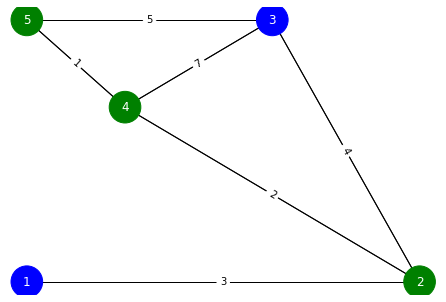

In [45]:
G = nx.Graph()
G.add_node(1,pos=(0,0), nodetype = "blue")
G.add_node(2,pos=(8,0), nodetype = "green")
G.add_node(3,pos=(5,3), nodetype = "blue")
G.add_node(4,pos=(2,2), nodetype = "green")
G.add_node(5,pos=(0,3), nodetype = "green")

colors = [u[1] for u in G.nodes(data="nodetype")]

G.add_edge(1,2,weight=3)
G.add_edge(2,3,weight=4)
G.add_edge(2,4,weight=2)
G.add_edge(3,4,weight=7)
G.add_edge(3,5,weight=5)
G.add_edge(4,5,weight=1)

#G.add_edges_from([(1, 2), (2, 3), (2, 4), (3, 4),(3, 5),(4, 5)])

#nx.write_gpickle(G, "pathToGraphPickleFile.nx")
#graph = nx.read_gpickle("pathToGraphPickleFile.nx")

pos=nx.get_node_attributes(G, 'pos')
nx.draw(G,pos)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos = 0.5, font_size = 10)
nx.draw(G, pos, node_size = 1000, cmap=plt.get_cmap('viridis'), node_color=colors, with_labels=True, font_size=12, font_color='white')

We can add the weight up, so we will get $3+4+7+5 = 19$

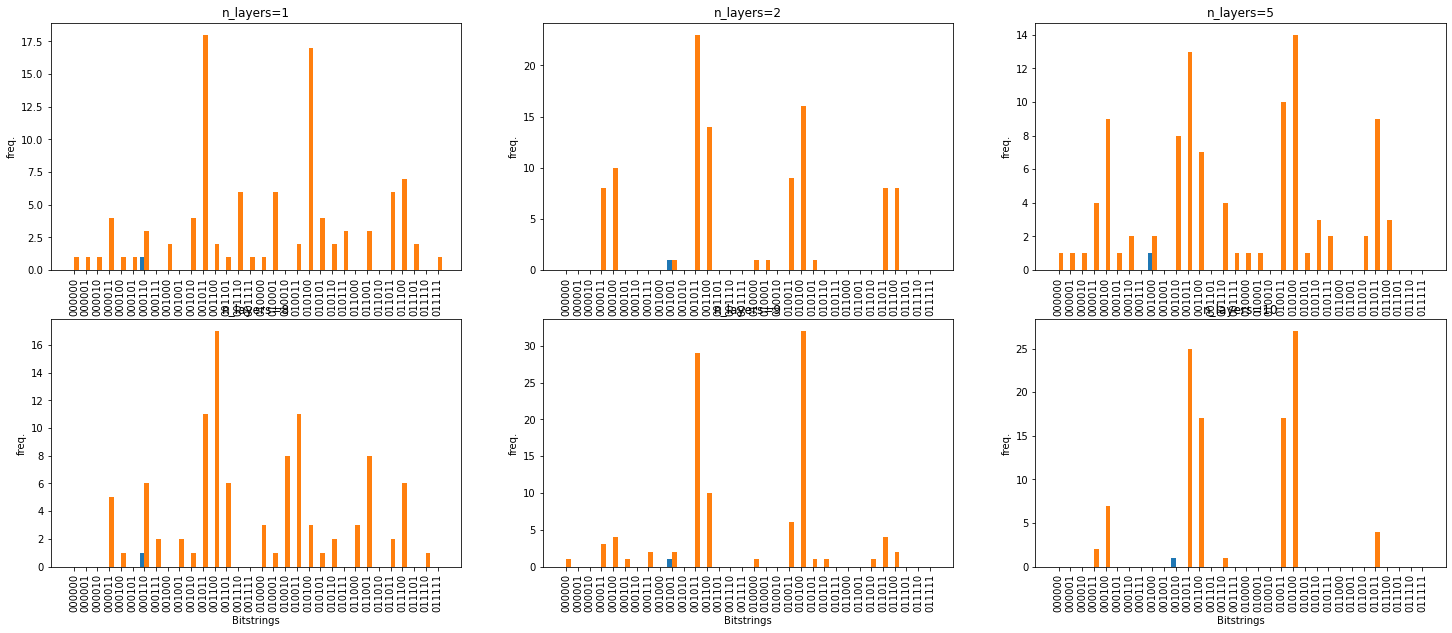

In [46]:
import matplotlib.pyplot as plt

xticks = range(0, 32)
xtick_labels = list(map(lambda x: format(x, "06b"), xticks))
bins = np.arange(0, 33) - 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.title("n_layers=1")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings1, bins=bins)

plt.subplot(2, 3, 2)
plt.title("n_layers=2")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings2, bins=bins)

plt.subplot(2, 3, 3)
plt.title("n_layers=5")
plt.xlabel("Bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings3, bins=bins)

plt.subplot(2, 3, 4)
plt.title("n_layers=8")
plt.xlabel("Bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings4, bins=bins)

plt.subplot(2, 3, 5)
plt.title("n_layers=9")
plt.xlabel("Bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings5, bins=bins)

plt.subplot(2, 3, 6)
plt.title("n_layers=10")
plt.xlabel("Bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings6, bins=bins)

#plt.tight_layout()
plt.show()

# Reference
[Quantum Approximate Optimization Algorithm (QAOA)](https://grove-docs.readthedocs.io/en/latest/qaoa.html)

[Properties of Hermitian](https://www.quantumsciencephilippines.com/130/properties-of-hermitian-operators/)

[Explain why hermitian operators are important in quantum mechanics](https://study.com/academy/answer/a-explain-why-hermitian-operators-are-important-in-quantum-mechanics-b-use-the-expression-for-the-momentum-operator-hat-p-x-to-derive-the-expression-for-the-kinetic-energy-operator-hat-t-x-c.html)

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html

https://appdividend.com/2020/05/09/numpy-random-rand-example-np-random-rand-in-python/

https://www.physicsoverflow.org/13592/correct-eigenvector-diagonalized-hamiltonian-quantization

https://lucaman99.github.io/new_blog/2020/mar16.html

https://www.mustythoughts.com/quantum-approximate-optimization-algorithm-explained

https://miro.medium.com/max/2076/1*k-Ul0kYhGTSGF4cVGIedTg.png

https://medium.com/mit-6-s089-intro-to-quantum-computing/qaoa-bench-marking-7dfdd8a31e54

https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.fAW8P_cJRNwGQ-syuntCzwAAAA%26pid%3DApi&f=1

https://medium.com/qiskit/the-variational-quantum-eigensolver-43f7718c2747

https://arrayjson.com/numpy-random-seed/



